In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the data
df=pd.read_csv('AirPassenger.csv')

In [3]:
#Check the datatype
df.dtypes

Year-Month    object
Pax            int64
dtype: object

Year month column is not in date object

In [4]:
# We are providing input to tell pandas that we are trying to work with time series.
df1= pd.read_csv('AirPassenger.csv',parse_dates= ['Year-Month'])

In [5]:
df1.dtypes
# ns stands for nano seconds

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

Now the time series reference is appropriately identified

In [6]:
# It is recomended that we make our time series reference as index
df1= pd.read_csv('AirPassenger.csv', parse_dates=['Year-Month'], index_col='Year-Month')

In [7]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
# Now we can conviniently do slicing i.e. obtain data for specific time period
df1['1949-01-01':'1950-01-01']

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [9]:
# We can check values for corresponding to a specific time point
df1.loc['1960-08-01']

Pax    606
Name: 1960-08-01 00:00:00, dtype: int64

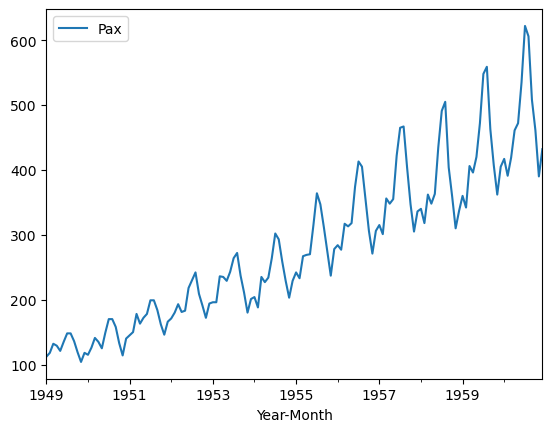

In [10]:
# Plot the time series

df1.plot()
plt.show()

We can see the increasing Trend and Seasonality which is not constant in nature

# Decompose the time series Additively

In [11]:
df1_add_decompose = seasonal_decompose(df1,model='additive')

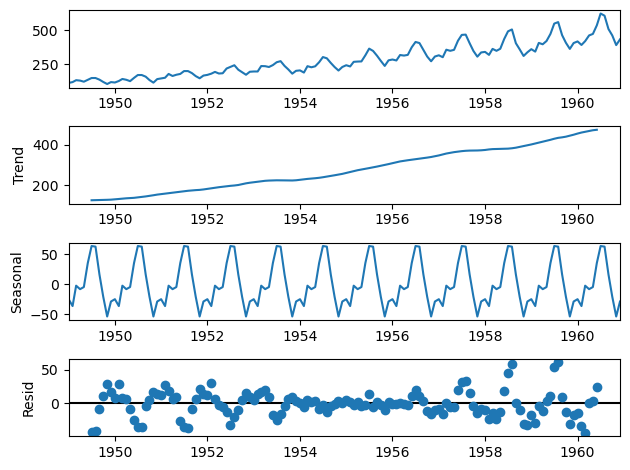

In [12]:
df1_add_decompose.plot()
plt.show()

# Decompose the time series Multiplicative

In [13]:
df1_mul_decompose = seasonal_decompose(df1,model='multiplicative')

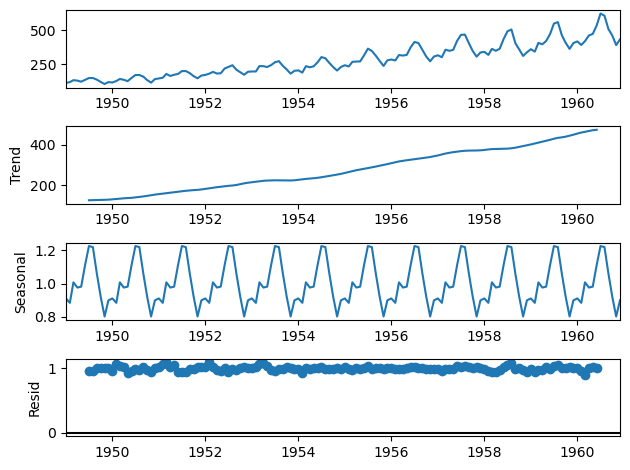

In [14]:
df1_mul_decompose.plot()
plt.show()

In [15]:
# Now lets try to do a log transformation
# Fist we will make a copy of our original dataset
df_log = df1.copy()

In [17]:
df_log['Pax'] = np.log(df1)

In [18]:
df_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

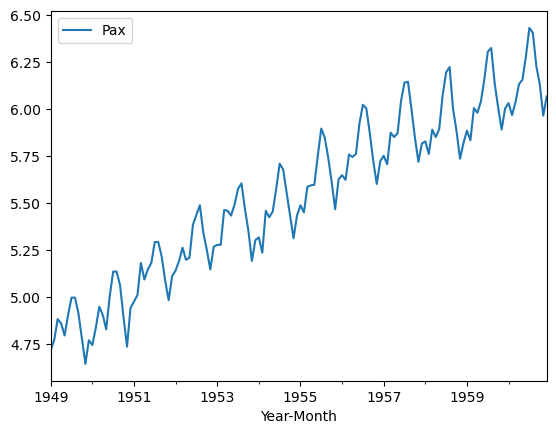

In [19]:
# Visualize the log transformed series
df_log.plot()
plt.show()

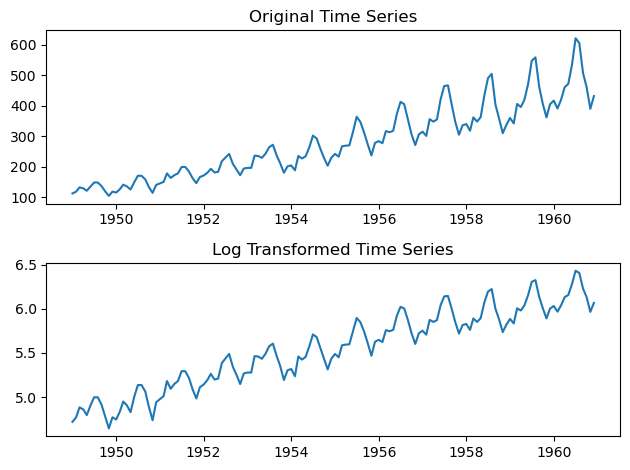

In [20]:
# Now we will compare the df_log with the original one
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)

plt.tight_layout()

From above plots we can see the Log Transformed Time Series is more constant than the original one

# Example - 2

In [21]:
df2 = pd.read_csv('daily-total-female-births.csv')

In [24]:
df2.dtypes

Date      object
Births     int64
dtype: object

As the 'Date' is in Object type so we will convert that into datetime64 type

In [33]:
df2 = pd.read_csv('daily-total-female-births.csv', parse_dates = ['Date'],index_col='Date')

In [34]:
df2.dtypes

Births    int64
dtype: object

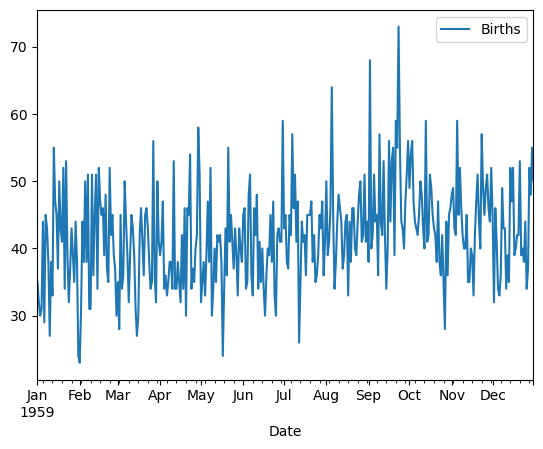

In [35]:
# Visualize the Time Series
df2.plot()
plt.show()

Above plot does not show clear Trend and Seasonality so we will Decompose the data

In [38]:
# Additive Decomposition
df2_add_decompose = seasonal_decompose(df2,model='additive')


In [41]:
#To increase the fig size
from pylab import rcParams

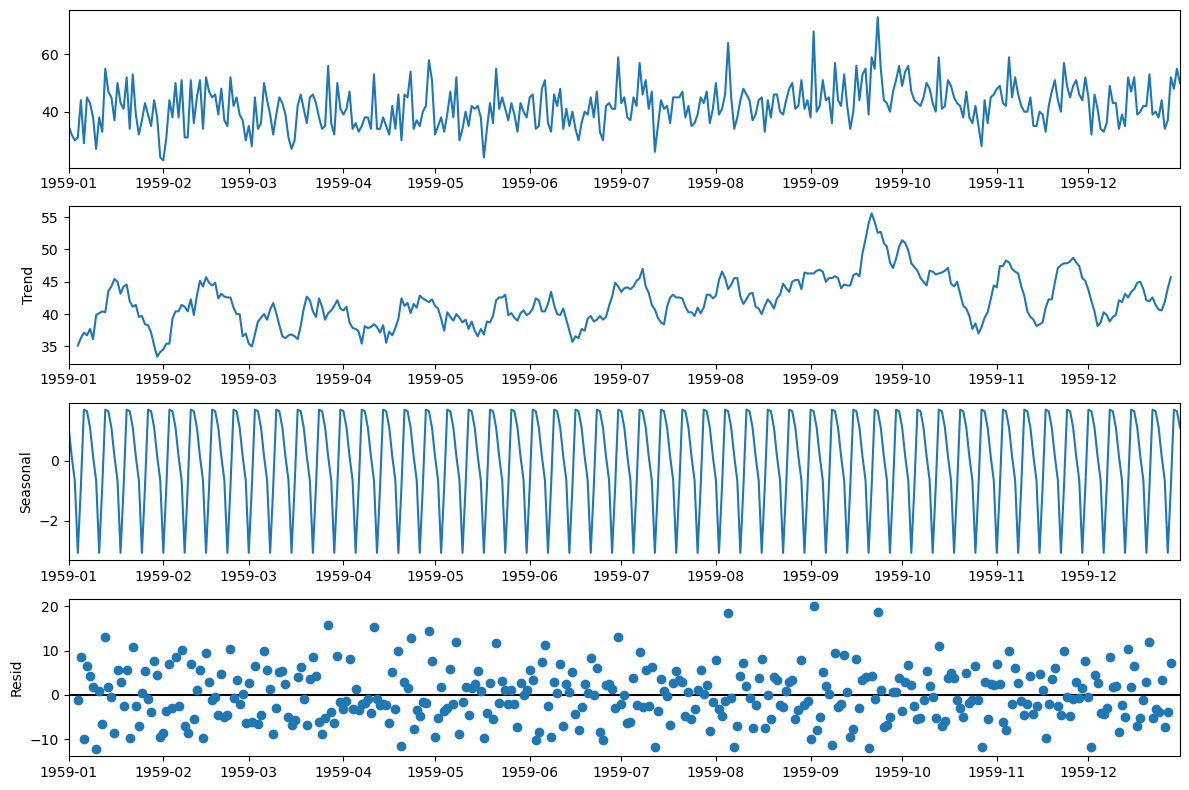

In [42]:
rcParams['figure.figsize'] = 12,8
df2_add_decompose.plot()
plt.show()

In [43]:
# Lets inspect each component
df2_add_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [44]:
df2_add_decompose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [45]:
df2_add_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [46]:
# Since this is an additive model
# Observed = Trend + Seasonal + Resid
35.142857 -3.077608 -1.065249

31.0

In [48]:
# Lets check the original value
# 4rth record should be equal to 31
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [50]:
# Multiplicative Time Series Model
df2_mul_decompose = seasonal_decompose(df2, model = 'multiplicative')

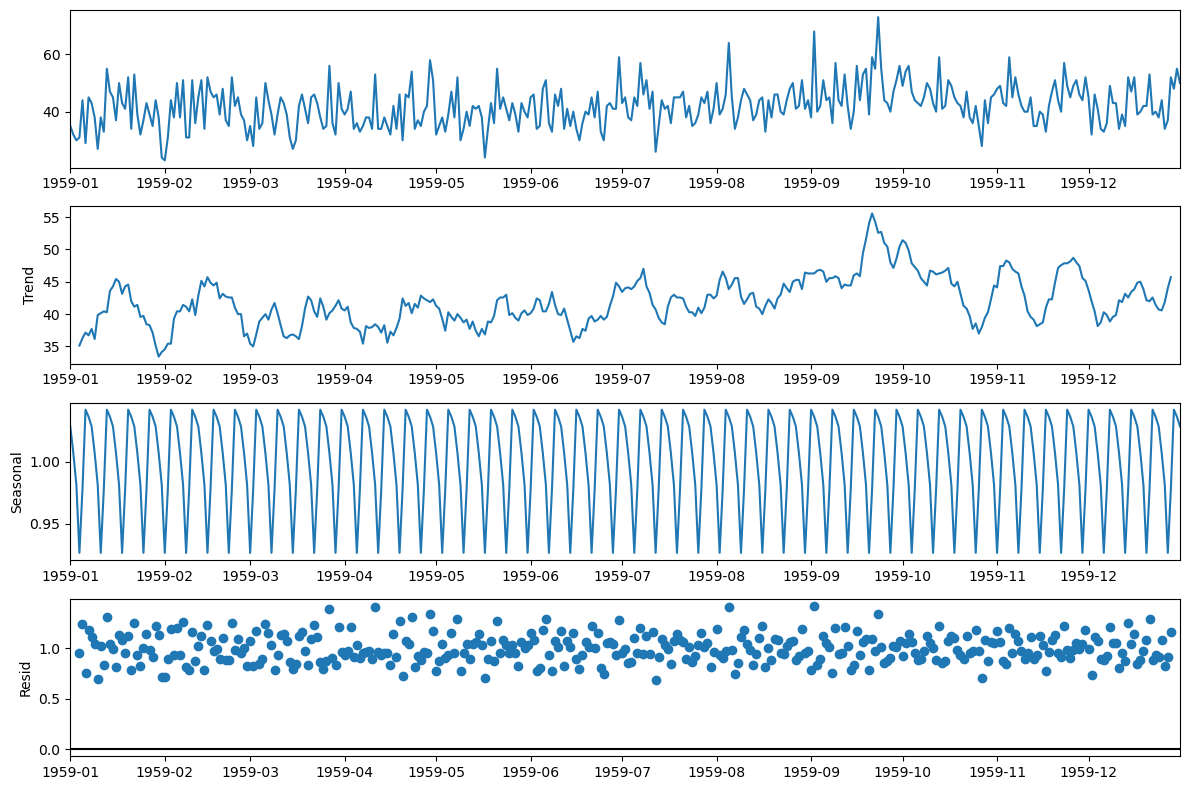

In [52]:
df2_mul_decompose.plot()
plt.show()

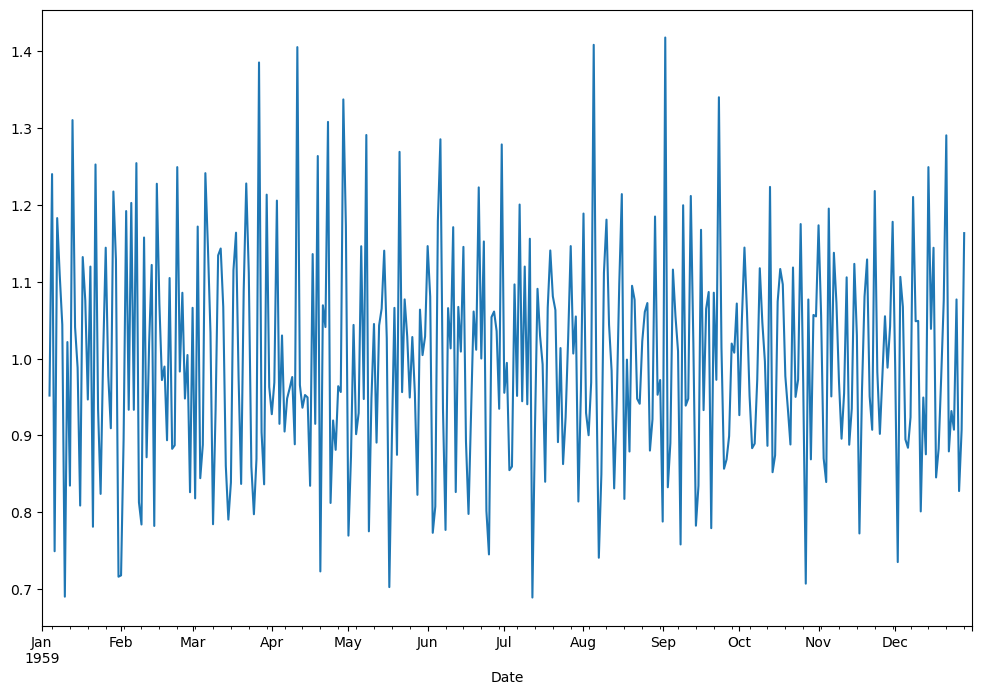

In [53]:
# Residual seems random here same like additive model
# We can visualize residual seperately 
df2_mul_decompose.resid.plot()
plt.show()

In [56]:
df2_mul_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [57]:
df2_mul_decompose.seasonal

Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64

In [58]:
df2_mul_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [59]:
# Since this is multiplicative model
# Observed = Trend * Seasonal * Resid
35.142857 * 0.926726 * 0.951861

31.000018005863094

In [60]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


# Downsampling

In [61]:
# Lets change the monthly series to quarterly. This would require aggregation
df1_quarterly = df1.resample('Q').mean()

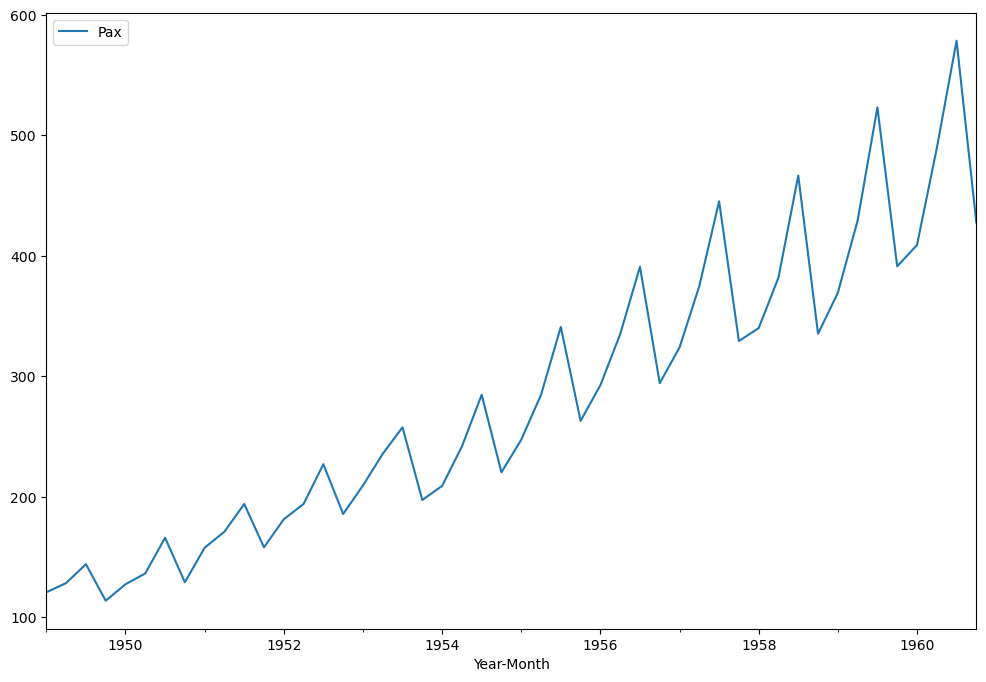

In [62]:
df1_quarterly.plot()
plt.show()

# Upsampling

In [64]:
# Lets change the monthly series to Daily. 
df1_daily = df1.resample('D').ffill() #ffill() stands for Forward fill .

In [65]:
df1_daily

,Pax
Year-Month,
1949-01-01,112
1949-01-02,112
1949-01-03,112
1949-01-04,112
1949-01-05,112
...,...
1960-11-27,390
1960-11-28,390
1960-11-29,390


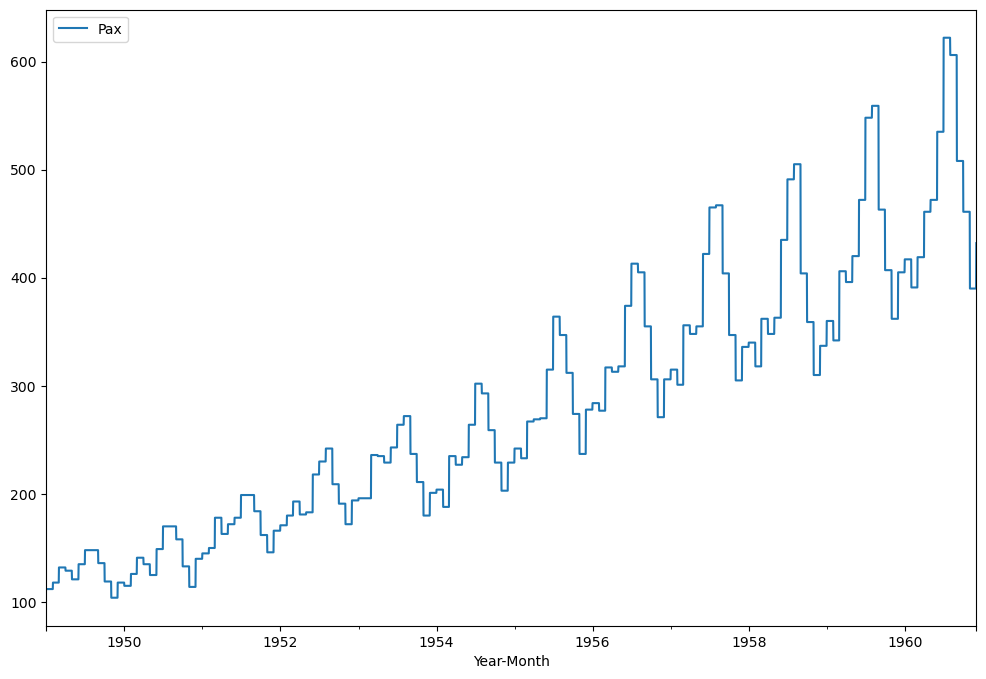

In [67]:
# As the data frame is more Granual due to Upsampling so we can observe there is a complex pattern in the below plot
df1_daily.plot()
plt.show()

In [68]:
# Lets change the monthly series to hourly
df1_hourly = df1.resample('H').interpolate()

In [70]:
df1_hourly

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


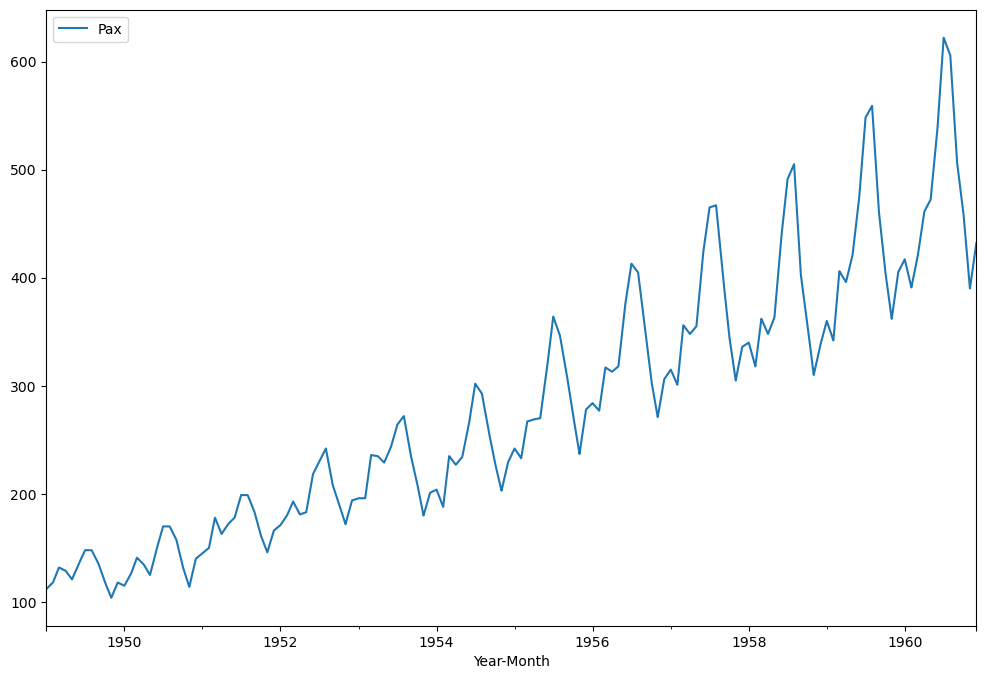

In [69]:
df1_hourly.plot()
plt.show()